# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')

In [11]:
data.loc[data.Gender =="Female"]

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [17]:
male_df.mean()[0]

69.02634590621737

In [18]:

male_df =  data.loc[data.Gender == "Male"]
female_df =  data.loc[data.Gender == "Female"]
display(male_df.describe())
female_df.describe()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

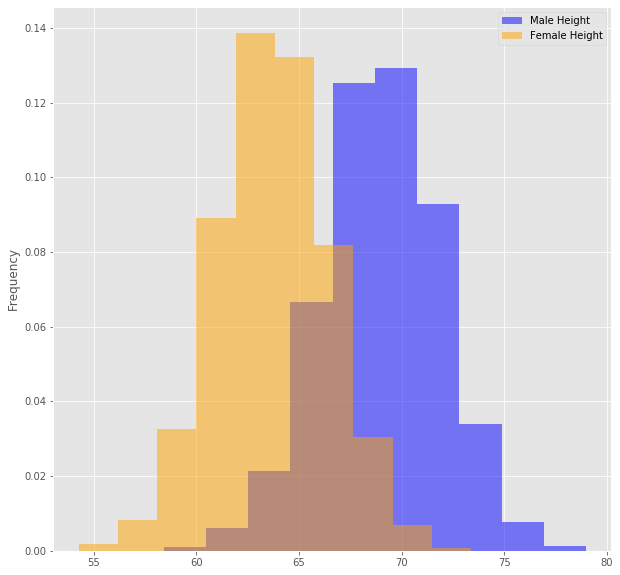

In [31]:
new_figure = plt.figure(figsize=(10,10))
plt.hist(male_df.Height,color="blue", bins=10, density=True, alpha = .5, label="Male Height")
plt.hist(female_df.Height,color ="orange", bins=10, density = True, alpha = .5, label="Female Height")
plt.ylabel("Frequency")
plt.legend()
plt.show()# Your code here

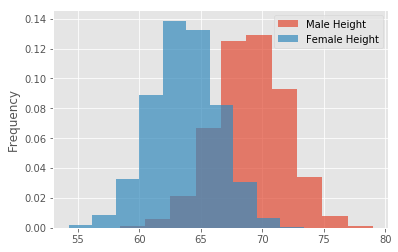

In [17]:
#Answer
# binsize = 10
# male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
# female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
# plt.legend()
# plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?
#Males have higher tendency in height which does inline with my personal observations.
#both heights are normally distributed. Average height range of the female is in between
# 60-68 inches, and male is in between 66-73 inches.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

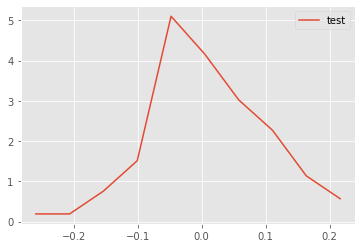

In [33]:
def density(x):
    #Initiate the histogram values
    n, bins = np.histogram(x, 10, density=1)
    
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

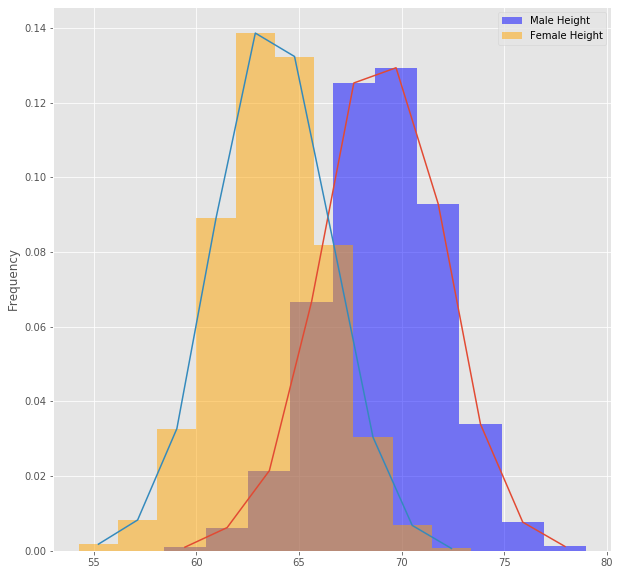

In [34]:
new_figure = plt.figure(figsize=(10,10))
plt.hist(male_df.Height,color="blue", bins=10, density=True, alpha = .5, label="Male Height")
x1,y1 = density(male_df.Height)
plt.plot(x1,y1)
plt.hist(female_df.Height,color ="orange", bins=10, density = True, alpha = .5, label="Female Height")
x2,y2 = density(female_df.Height)
plt.plot(x2,y2)
plt.ylabel("Frequency")
plt.legend()
plt.show()

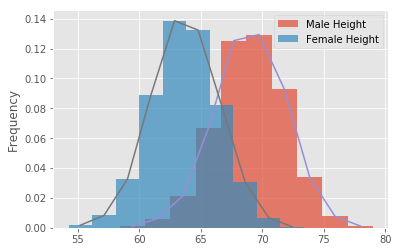

In [20]:
# male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
# female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
# plt.legend()
# x,y = density(male_df.Height)
# plt.plot(x,y)
# x,y = density(female_df.Height)
# plt.plot(x,y)
# plt.show()
# Your code here 

## Repeat the above exercise for male and female weights

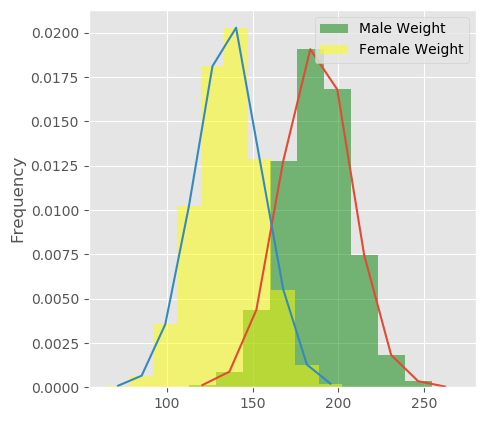

In [48]:
new_figure = plt.figure(figsize=(5,5), dpi = 100)
plt.hist(male_df.Weight,color="green", bins=10, density=True, alpha = .5, label="Male Weight")
x3,y3 = density(male_df.Weight)
plt.plot(x3,y3)
plt.hist(female_df.Weight,color ="yellow", bins=10, density = True, alpha = .5, label="Female Weight")
x4,y4 = density(female_df.Weight)
plt.plot(x4,y4)
plt.ylabel("Frequency")
plt.legend()
plt.show()

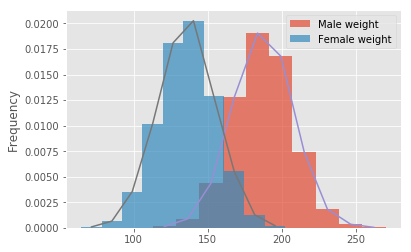

In [21]:
# male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male weight");
# female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female weight');
# plt.legend()
# x,y = density(male_df.Weight)
# plt.plot(x,y)
# x,y = density(female_df.Weight)
# plt.plot(x,y)
# plt.show()
# Your code here 

## Write your observations in the cell below

##### Record your observations - are these inline with your personal observations?
Males are tend to be heavier than females which inlines with my personal observations. Both male and female weights are normally distributed. Female normal weight range is in between of 110 - 160lb and male normal weight range is from 160 - 220 lb. In general, males are about 50lb heavier than females.

##### What is the takeaway when comparing male and female heights and weights?
When we look at both male and female heights and weights deistributions, we can see the normal physical attributions differences between genders. Males are generally taller and heavier than females. We can also see some correlation between weights and heights. Taller people might tend to be heavier than shorter people. 

In [ ]:
#Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

In [49]:
import seaborn as sns

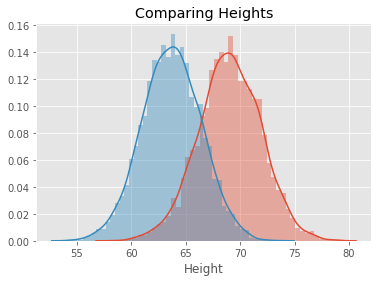

In [50]:
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()# Code for heights here

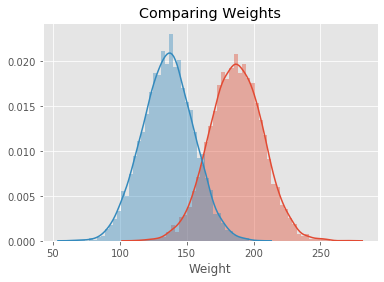

In [51]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()
# Code for weights here

##### Your comments on the two approaches here.
Seaborn has a smoother graph than the matplot.

##### Are they similar? what makes them different if they are?
They are similar in results with even density. The difference between them is the areas under the curve.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.